# PROTÓTIPO PHI RDF

Controle de versão: 1.0.0

Data de início do desenvolvimento: 21/03/2023

Responsável pelo desenvolvimento: Felipe André Zeiser



****

**Informações importantes**


As propostas e produtos apresentados podem propor diferentes
enfoques, metodologias, recursos, instrumentos e demais
componentes, desde que mantenha seu escopo integralmente
vinculado ao enfrentamento à COVID-19, e seus efeitos diretos ou
secundários, no Distrito Federal; 

Devem ser soluções digitais relacionadas à comunicação em
saúde (aplicativos e sistemas) que sejam: úteis, inclusivas, seguras,
acessíveis, amigáveis, de acesso rápido à informação rápida e que
possam ser utilizadas por pessoas gestoras e ou profissionais de
saúde e/ou usuárias.

Devem obedecer aos princípios e diretrizes do SUS, conforme Lei n.
8.080, de 1990 http://www.planalto.gov.br/ccivil_03/leis/l8080.htm

Devem observar as diretrizes e missão institucional da Fiocruz, a sua
Política de Inovação https://portal.fiocruz.br/documento/politica-deinovacao-da-fiocruz e a Portaria nº 1286/2018https://portal.fiocruz.br/documento/portaria-1286-2018-pr-0.

Devem observar as diretrizes do Convênio para PD&I Nº
59/2020(FIOCRUZ) - Nº 04/2020(FAP)

Devem obedecer à Política de Comunicação e à Política de
Divulgação Científica da Fiocruz
https://www.arca.fiocruz.br/bitstream/handle/icict/41668/politica_de_co
municacao_da_fiocruz.pdf;jsessionid=96EE10FE1D5DBDE004660770
2CF5F13A?sequence=2
https://portal.fiocruz.br/sites/portal.fiocruz.br/files/documentos/politica_d
e_divulgacao_cientifica_da_fiocruz.pdf 



Para tanto, desde que em interface com a comunicação em saúde, poderão ser
desenvolvidas propostas e projetos que proporcionem, por exemplo:

 Sobre os focos da doença; logística e aquisições de materiais;
medicina diagnóstica; medicina de tratamento; medicina de
acompanhamento; suporte técnico, científico e emocional,
diretamente aos gestores e aos trabalhadores do sistema de saúde
do GDF; etc. 

Mitigação de crises setoriais; desemprego; problemas de
abastecimento; identificação de oportunidades; adequação e
redireccionamento da estrutura produtiva e logística; etc. 

A partir dos sistemas de informação do SUS facilitar a comunicação
organizacional entre a equipe de saúde e os usuários, divulgando os
conhecimentos da sua situação geral de saúde e do seu caminho no
SUS;

A melhoria das informações, por meio do mapeamento de
informações a respeito das unidades de saúde e suas
especialidades, facilitando acessos e diminuindo esperas, entre
outras; 

Uma Vigilância comunitária mais fortalecida – melhorando a
qualidade da comunicação entre todas as organizações e níveis de
gestão, assim como as notificações e ações de prevenção; 

Informações mais fáceis para as equipes de saúde, por meio da
integração de sistemas como E-sus EAD e E-sus Território; Relatórios
Gerenciais com informações e painéis atualizados em tempo real;

https://towardsdatascience.com/preprocessing-time-series-data-for-supervised-learning-2e27493f44ae

In [1]:
# Instala bibliotecas auxiliares


# https://ipeagit.github.io/geobr/articles/python-intro/py-intro-to-geobr.html
!pip install geobr descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

import geobr

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cd drive/MyDrive/Code/

/content/drive/MyDrive/Code


In [5]:
# Hiperparametros

ESTADO = 'RS'
COLUNAS_DATAS = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC', \
                 'DT_INTERNA', 'DT_ENTUTI', 'DT_SAIDUTI', 'DT_EVOLUCA']

BINS_IDADE = [-1,19,39,49,59,69,79,140]

COMORBIDADES = ['PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', \
                'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', \
                'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE']

SINTOMAS = ['DIARREIA', 'VOMITO', 'DOR_ABD', 'PERD_OLFT', \
            'PERD_PALA', 'DISPNEIA', 'TOSSE', 'DESC_RESP', \
            'GARGANTA', 'FEBRE', 'FADIGA', 'SATURACAO']





sns.set_theme(style='whitegrid')
sns.set_color_codes('pastel')

In [6]:
# Funções úteis

def calcula_idade(row):
  
  try:
    dt_nasc = str(row['DT_NASC'])
    dt_int = str(row['DT_INTERNA'])

    nasc_day = int(dt_nasc[8:10])
    nasc_month = int(dt_nasc[5:7])
    nasc_year = int(dt_nasc[0:4])

    int_day = int(dt_int[8:10])
    int_month = int(dt_int[5:7])
    int_year = int(dt_int[0:4])

    age = int_year - nasc_year - ((int_month, int_day) < (nasc_month, nasc_day))
    return age
  except ValueError:
    return np.nan
  except TypeError:
    return np.nan

# def print_dados():

In [7]:
dados = pd.read_csv('INFLUD21-06-03-2023.csv', sep=';', low_memory=False)

### Definindo apenas um estado para a análise

In [8]:
dados_rs = dados[dados['SG_UF_NOT'] == ESTADO]
dados_rs = dados_rs[dados_rs['SG_UF'] == ESTADO]

In [10]:
print("O tamanho do conjunto de dados para o estado do {} é de {} amostras".format(ESTADO,dados_rs.shape[0]))

O tamanho do conjunto de dados para o estado do RS é de 100850 amostras


In [11]:
# Ajusta as datas do conjunto de dados
# Processa as colunas com datas, convertendo o tipo de dados Objeto para Datetime

dados_rs[COLUNAS_DATAS] = dados_rs[COLUNAS_DATAS].apply(pd.to_datetime, format='%d/%m/%Y')

In [12]:
# Mantém apenas os registros com internação
internados = dados_rs['HOSPITAL'].value_counts()

print("Tamanho do conjunto de dados {}\n\n".format(dados_rs.shape[0]))

print("Quantidade de pacientes hospitalizados:")
print("Sim - {} pacientes".format(internados[1]))
print("Não - {} pacientes".format(internados[2]))
print("Ignorados - {} pacientes".format(internados[9]))

dados_rs = dados_rs[dados_rs['HOSPITAL']==1]

print("\n\nTamanho do conjunto de dados de pacientes hospitalizados {}\n\n".format(dados_rs.shape[0]))

# Remove casos nosocomiais, em virtude de serem infecções adquiridas
# em ambiente hospitalar e estão fora do escopo de predição de novos
# casos que necessitem de internação

internados = dados_rs['NOSOCOMIAL'].value_counts()

print("Tamanho do conjunto de dados {}\n\n".format(dados_rs.shape[0]))

print("Quantidade de pacientes nosocomiais:")
print("Sim - {} pacientes".format(internados[1]))
print("Não - {} pacientes".format(internados[2]))
print("Ignorados - {} pacientes".format(internados[9]))

dados_rs = dados_rs[dados_rs['NOSOCOMIAL']!=1]

print("\n\nTamanho do conjunto de dados de pacientes não nosocomiais {}\n\n".format(dados_rs.shape[0]))


# Remove casos de pacientes Não Covid
# TO DO ajustar o print a seguir
# TO DO criar uma função genérica para os prints
print("Tamanho do conjunto de dados {}\n\n".format(dados_rs.shape[0]))

print("Ajustar esse print\n",dados_rs['CLASSI_FIN'].value_counts())

dados_rs = dados_rs[dados_rs['CLASSI_FIN']==5]

print("\n\nTamanho do conjunto de dados de pacientes confirmados com COVID-19 {}\n\n".format(dados_rs.shape[0]))


Tamanho do conjunto de dados 100850


Quantidade de pacientes hospitalizados:
Sim - 99812 pacientes
Não - 830 pacientes
Ignorados - 41 pacientes


Tamanho do conjunto de dados de pacientes hospitalizados 99812


Tamanho do conjunto de dados 99812


Quantidade de pacientes nosocomiais:
Sim - 2550 pacientes
Não - 80357 pacientes
Ignorados - 2753 pacientes


Tamanho do conjunto de dados de pacientes não nosocomiais 97262


Tamanho do conjunto de dados 97262


Ajustar esse print
 5.0    77131
4.0    17188
2.0     1726
3.0      148
1.0      146
Name: CLASSI_FIN, dtype: int64


Tamanho do conjunto de dados de pacientes confirmados com COVID-19 77131




In [13]:
# Verifica a quantidade de dados faltantes para as datas

dados_rs[COLUNAS_DATAS].isnull().sum()

# Remove amostras com DT_INTERNA faltantes e sem DT_NASC


DT_NOTIFIC        0
DT_SIN_PRI        0
DT_NASC          18
DT_INTERNA      729
DT_ENTUTI     51249
DT_SAIDUTI    53958
DT_EVOLUCA     4114
dtype: int64

In [14]:
# Devida a diferente forma de registrar as idades dos pacientes, calculamos a
# idade de maneira manual
dados_rs['IDADE_CALCULADA'] = dados_rs.apply(calcula_idade, axis=1)

In [15]:
# Cria categorias etárias
dados_rs['FAIXA_ETARIA'] = pd.cut(dados_rs['IDADE_CALCULADA'], bins=BINS_IDADE)

In [16]:
# Cria uma lista para auxiliar nos plots
labels_faixa = []
for c in dados_rs['FAIXA_ETARIA'].cat.categories:
  lower_val, upper_val = c.left, c.right
  labels_faixa.append('%s para %s'%(lower_val+1, upper_val))

print(labels_faixa)
labels_faixa[-1] = str(BINS_IDADE[-2]+1)+' <'
print(labels_faixa)

['0 para 19', '20 para 39', '40 para 49', '50 para 59', '60 para 69', '70 para 79', '80 para 140']
['0 para 19', '20 para 39', '40 para 49', '50 para 59', '60 para 69', '70 para 79', '80 <']


In [17]:
# Cria contagem de dias hospitalizados, dias na uti, 
# dias até hospitalização, dias até uti

dados_rs['DIAS_HOSP'] = (pd.to_datetime(dados_rs['DT_EVOLUCA'], format="%Y-%m-%d") - pd.to_datetime(dados_rs['DT_INTERNA'],format="%Y-%m-%d")).dt.days
dados_rs['DIAS_UTI'] = (pd.to_datetime(dados_rs['DT_SAIDUTI'], format="%Y-%m-%d") - pd.to_datetime(dados_rs['DT_ENTUTI'],format="%Y-%m-%d")).dt.days
dados_rs['DIAS_ATEHOSP'] = (pd.to_datetime(dados_rs['DT_INTERNA'], format="%Y-%m-%d") - pd.to_datetime(dados_rs['DT_SIN_PRI'],format="%Y-%m-%d")).dt.days
dados_rs['DIAS_ATEUTI'] = (pd.to_datetime(dados_rs['DT_ENTUTI'], format="%Y-%m-%d") - pd.to_datetime(dados_rs['DT_INTERNA'],format="%Y-%m-%d")).dt.days

In [18]:
# Identificação de possíveis outliers

print("Dias Hospitalizados: max {} e min {}".format(dados_rs['DIAS_HOSP'].max(),dados_rs['DIAS_HOSP'].min()))
print("Dias na UTI: max {} e min {}".format(dados_rs['DIAS_UTI'].max(),dados_rs['DIAS_UTI'].min()))
print("Dias até Hospitalização: max {} e min {}".format(dados_rs['DIAS_ATEHOSP'].max(),dados_rs['DIAS_ATEHOSP'].min()))
print("Dias até UTI: max {} e min {}".format(dados_rs['DIAS_ATEUTI'].max(),dados_rs['DIAS_ATEUTI'].min()))

Dias Hospitalizados: max 445.0 e min 0.0
Dias na UTI: max 201.0 e min 0.0
Dias até Hospitalização: max 374.0 e min 0.0
Dias até UTI: max 274.0 e min 0.0


In [19]:
# Conta a quantidade de comorbidades por pacientes

qnt_comorbidades = np.where(dados_rs[COMORBIDADES] == 1, 1, 0)
dados_rs['QNT_COMORBIDADES'] = qnt_comorbidades.sum(axis=1)

In [20]:
# Conta a quantidade de sintomas por pacientes

qnt_sintomas = np.where(dados_rs[SINTOMAS] == 1, 1, 0)
dados_rs['QNT_SINTOMAS'] = qnt_sintomas.sum(axis=1)

In [21]:
# Pega os óbitos

obitos_rs = dados_rs[dados_rs['EVOLUCAO'] == 2]

### Verificando as colunas do Dataset

In [22]:
# COLUNAS = ['SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT', \
#            '']

In [23]:
# dados_rs['ID_UNIDADE'].value_counts()

In [24]:
all_muni = geobr.read_municipality(code_muni="RS", year=2020)
# Remove os últimos 3 digitos para dar match com o cod da SRAG
all_muni['code_muni'] = all_muni['code_muni'].astype(str).str[:-3].astype(np.int64)

/usr/local/lib/python3.9/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [25]:
pop_rs = pd.read_csv('pop_rs_fixed.csv', encoding='utf-8', sep=',', usecols=['Municipio', 'Codigo', 'Populacao'])

# Remove os últimos dois digitos para dar match com o cod da SRAG
pop_rs['Codigo'] = pop_rs['Codigo'].astype(str).str[:-1].astype(np.int64)

In [26]:
# Conta a quantidade de casos por COD do munícipio de residencia
acum_casos = dados_rs['CO_MUN_RES'].value_counts().rename_axis('CO_MUN_RES').reset_index(name='CASOS')

# Faz um left join dos casos com os dados da populacao
all_muni = all_muni.merge(acum_casos, how="left", left_on="code_muni", right_on="CO_MUN_RES")
all_muni = all_muni.merge(pop_rs, how="left", left_on="code_muni", right_on="Codigo")

In [27]:
# Calcula a quantidade de casos hospitalizados por 1000 habitantes por municipio de residencia
all_muni['CASOS1000'] = (all_muni['CASOS'] / all_muni['Populacao']) * 1000

/usr/local/lib/python3.9/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.9/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.9/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


(-58.0476623758, -49.2934322362, -34.08462179270001, -26.748858221300008)

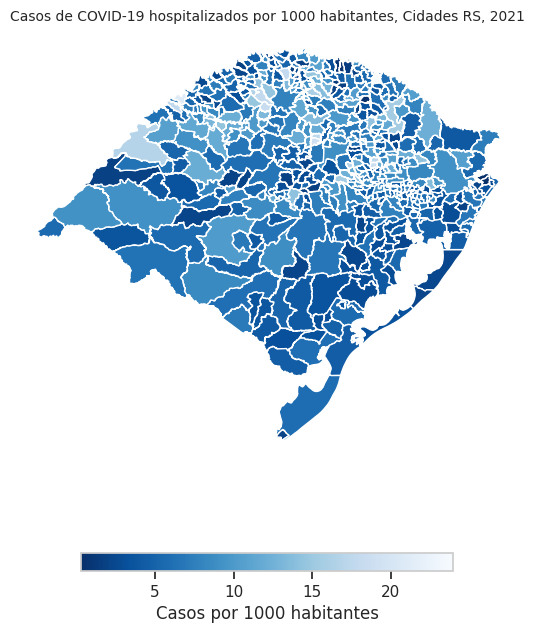

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))

all_muni.plot(
    column="CASOS1000",
    cmap="Blues_r",
    legend=True,

    
    legend_kwds={
        "label": "Casos por 1000 habitantes",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Casos de COVID-19 hospitalizados por 1000 habitantes, Cidades RS, 2021", fontsize=10)
ax.axis("off")

Analisa a piramide etária

In [29]:
# Realiza a contagem de casos por sexo e faixa etaria
piramide_etaria = dados_rs[['CS_SEXO','FAIXA_ETARIA']].value_counts().rename_axis(['CS_SEXO','FAIXA_ETARIA']).reset_index(name='CASOS')

# Inverte os valores para o sexo Masculino
piramide_etaria.loc[piramide_etaria['CS_SEXO'] == 'M', 'CASOS'] = 0 - piramide_etaria.loc[piramide_etaria['CS_SEXO'] == 'M', 'CASOS']

# Cria uma coluna para cada sexo
piramide_etaria = piramide_etaria.pivot_table('CASOS', ['FAIXA_ETARIA'], 'CS_SEXO')
piramide_etaria = piramide_etaria.reset_index()

# Ajustas as faixas etárias
piramide_etaria['FAIXA_ETARIA'] = labels_faixa

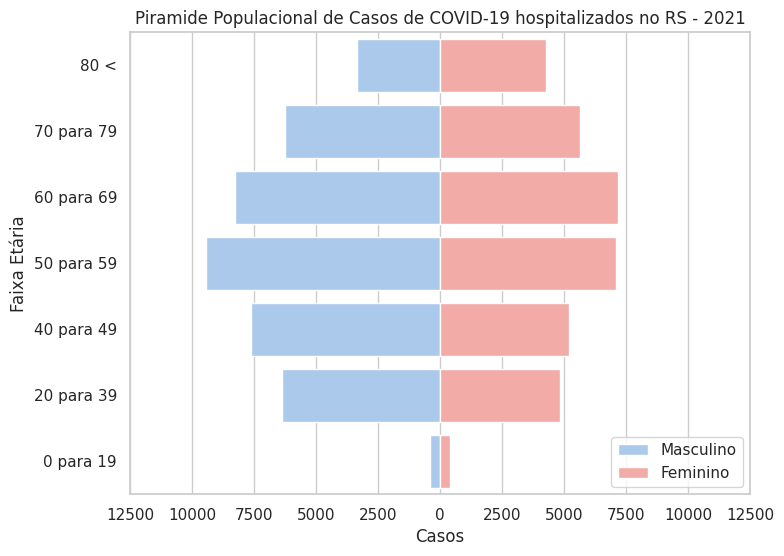

In [30]:
plt.figure(figsize=(8,6))

bar_plot = sns.barplot(x='M', y='FAIXA_ETARIA', data=piramide_etaria, order=labels_faixa[::-1], color='b', label='Masculino')
bar_plot = sns.barplot(x='F', y='FAIXA_ETARIA', data=piramide_etaria, order=labels_faixa[::-1], color='r', label='Feminino')
bar_plot.set(xlabel='Casos', ylabel="Faixa Etária", title='Piramide Populacional de Casos de COVID-19 hospitalizados no RS - 2021')

plt.xticks(ticks=[-12500,-10000,-7500,-5000,-2500,0,2500,5000,7500,10000,12500],
           labels=['12500','10000','7500','5000','2500','0','2500','5000','7500','10000','12500'])

plt.legend(loc='lower right')
plt.show()

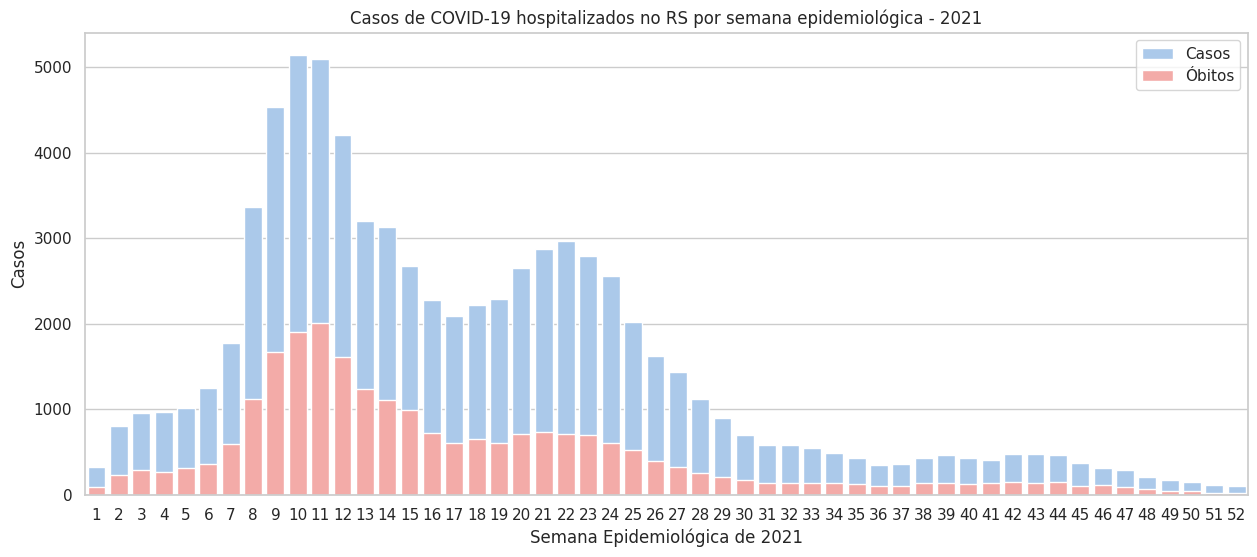

In [31]:
# Casos ao longo de cada semana epidemiológica
hist_casos = dados_rs['SEM_NOT'].value_counts().rename_axis(['SEMANA']).reset_index(name='CASOS')
hist_obitos = dados_rs[dados_rs['EVOLUCAO'] == 2]['SEM_NOT'].value_counts().rename_axis(['SEMANA']).reset_index(name='CASOS')
hist_uti = dados_rs[dados_rs['UTI'] == 1]['SEM_NOT'].value_counts().rename_axis(['SEMANA']).reset_index(name='CASOS')


plt.figure(figsize=(15,6))
bar_plot = sns.barplot(data=hist_casos, x='SEMANA', y='CASOS', color='b', label='Casos')
bar_plot = sns.barplot(data=hist_obitos, x='SEMANA', y='CASOS', color='r', label='Óbitos')

bar_plot.set(xlabel='Semana Epidemiológica de 2021', ylabel='Casos', title='Casos de COVID-19 hospitalizados no RS por semana epidemiológica - 2021')

plt.legend(loc='upper right')
plt.show()

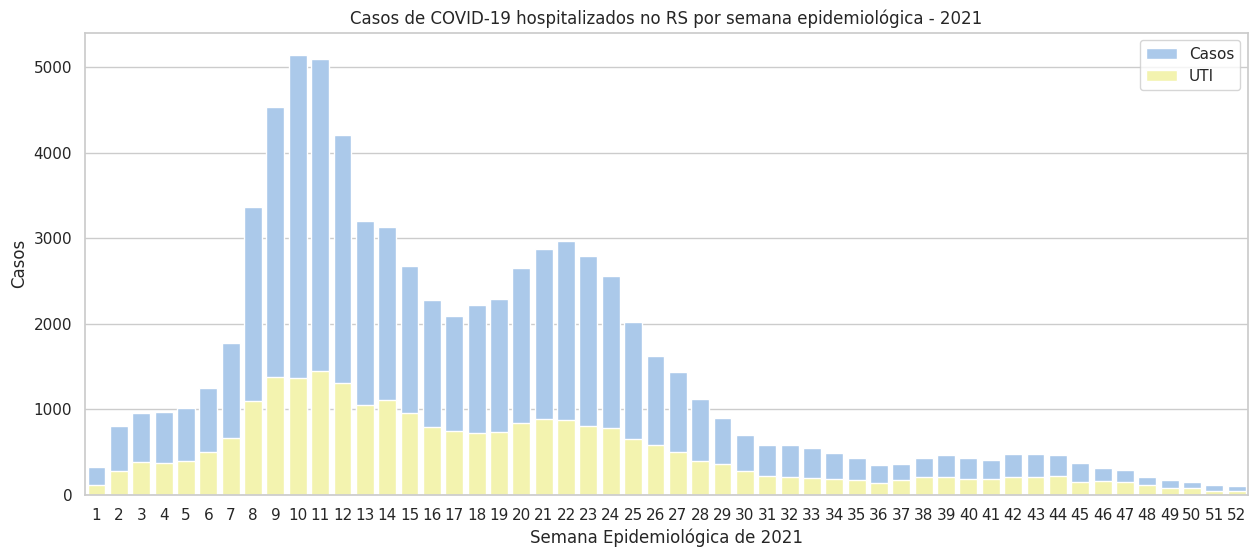

In [32]:
plt.figure(figsize=(15,6))
bar_plot = sns.barplot(data=hist_casos, x='SEMANA', y='CASOS', color='b', label='Casos')
bar_plot = sns.barplot(data=hist_uti, x='SEMANA', y='CASOS', color='y', label='UTI')

bar_plot.set(xlabel='Semana Epidemiológica de 2021', ylabel='Casos', title='Casos de COVID-19 hospitalizados no RS por semana epidemiológica - 2021')

plt.legend(loc='upper right')
plt.show()

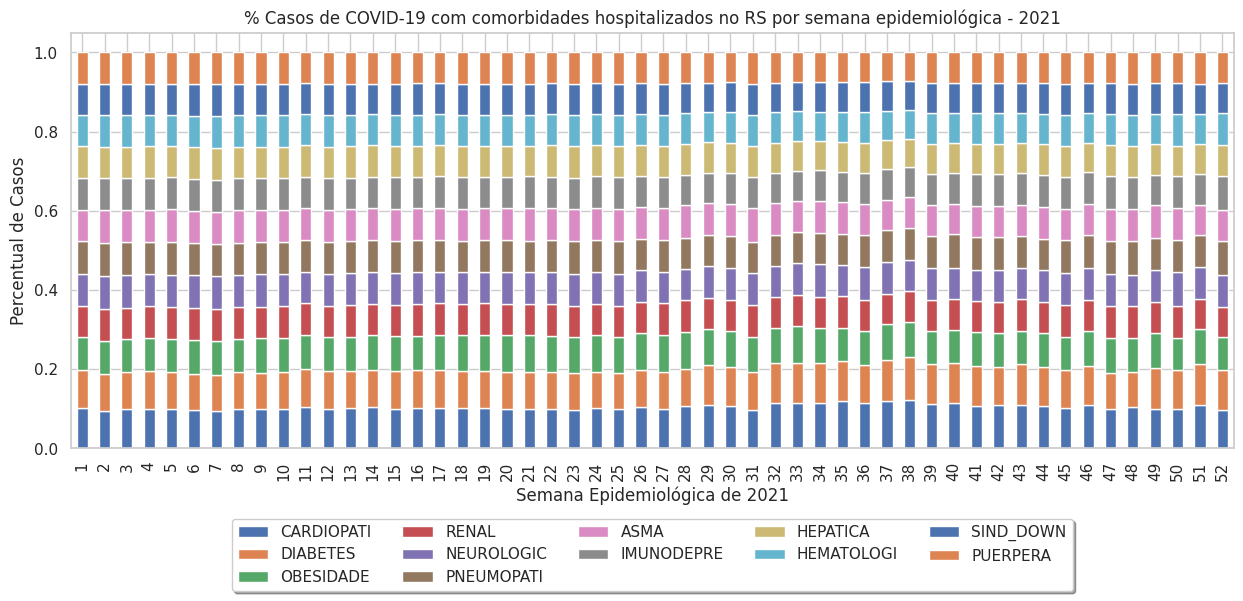

In [33]:
count_comorbidades = dados_rs.groupby('SEM_NOT')[['CARDIOPATI','DIABETES',\
                                                  'OBESIDADE','RENAL',\
                                                  'NEUROLOGIC','PNEUMOPATI',\
                                                  'ASMA','IMUNODEPRE',\
                                                  'HEPATICA','HEMATOLOGI',\
                                                  'SIND_DOWN','PUERPERA']].count()

plot = count_comorbidades.divide(count_comorbidades.sum(axis=1), axis=0).plot.bar(stacked=True, figsize=(15,6))

plot.set(xlabel='Semana Epidemiológica de 2021', ylabel='Percentual de Casos', title='% Casos de COVID-19 com comorbidades hospitalizados no RS por semana epidemiológica - 2021')
box = plot.get_position()
plot.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

plt.show()


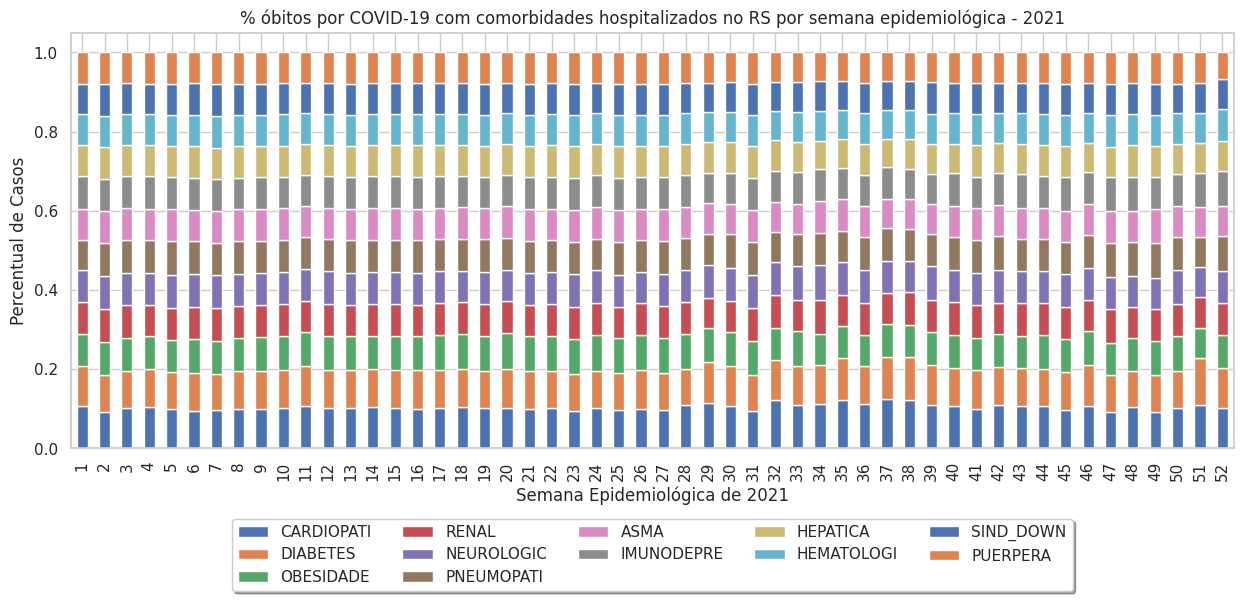

In [34]:
count_comorbidades = dados_rs[dados_rs['EVOLUCAO']==2].groupby('SEM_NOT')[['CARDIOPATI','DIABETES',\
                                                  'OBESIDADE','RENAL',\
                                                  'NEUROLOGIC','PNEUMOPATI',\
                                                  'ASMA','IMUNODEPRE',\
                                                  'HEPATICA','HEMATOLOGI',\
                                                  'SIND_DOWN','PUERPERA']].count()

plot = count_comorbidades.divide(count_comorbidades.sum(axis=1), axis=0).plot.bar(stacked=True, figsize=(15,6))

plot.set(xlabel='Semana Epidemiológica de 2021', ylabel='Percentual de Casos', title='% óbitos por COVID-19 com comorbidades hospitalizados no RS por semana epidemiológica - 2021')
box = plot.get_position()
plot.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

plt.show()


### Preparação dos dados

In [35]:
COLUNAS_SIVEP = ['municipionotificacao',
                  'sexo', 'racacor', 'municipio',
                  'datanotificacao', 'datainiciosintomas', 
                  'idade', 'sem_not', 'faixa_etaria',
                  'dias_atenot', 'qnt_sintomas', 'qnt_comorbidades']

In [36]:
COLUNAS_SRAG = ['ID_MUNICIP',
                'CS_SEXO', 'CS_RACA', 'ID_MN_RESI',
                'DT_NOTIFIC', 'DT_SIN_PRI', 'IDADE_CALCULADA',
                'SEM_PRI', 'FAIXA_ETARIA', 'DIAS_ATEHOSP',
                'QNT_SINTOMAS', 'QNT_COMORBIDADES']

In [37]:
dados_exp = dados_rs[COLUNAS_SRAG]
dados_exp.columns = COLUNAS_SIVEP

In [38]:
dados_exp.to_pickle('dados_srag.pickle')